Skewness & Kurtosis


Blue Channel:
Mean Intensity: 107.1390336225236
Variance: 4242.493537787696
Standard Deviation: 65.13442667121356
Skewness: -0.10280773026154982
Kurtosis: -1.2746782789297046

Green Channel:
Mean Intensity: 132.8582978078048
Variance: 2737.692908497303
Standard Deviation: 52.32296731357371
Skewness: -0.0936257138971653
Kurtosis: -0.6714817987866333

Red Channel:
Mean Intensity: 133.69132990127642
Variance: 4230.845628858107
Standard Deviation: 65.04495083292866
Skewness: 0.14168903576266487
Kurtosis: -0.7652554144444466


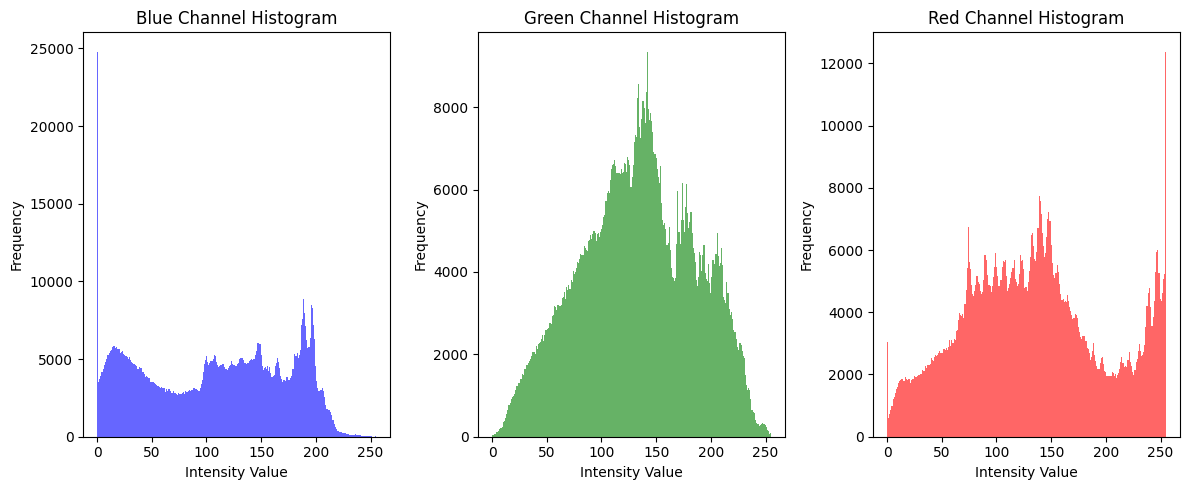

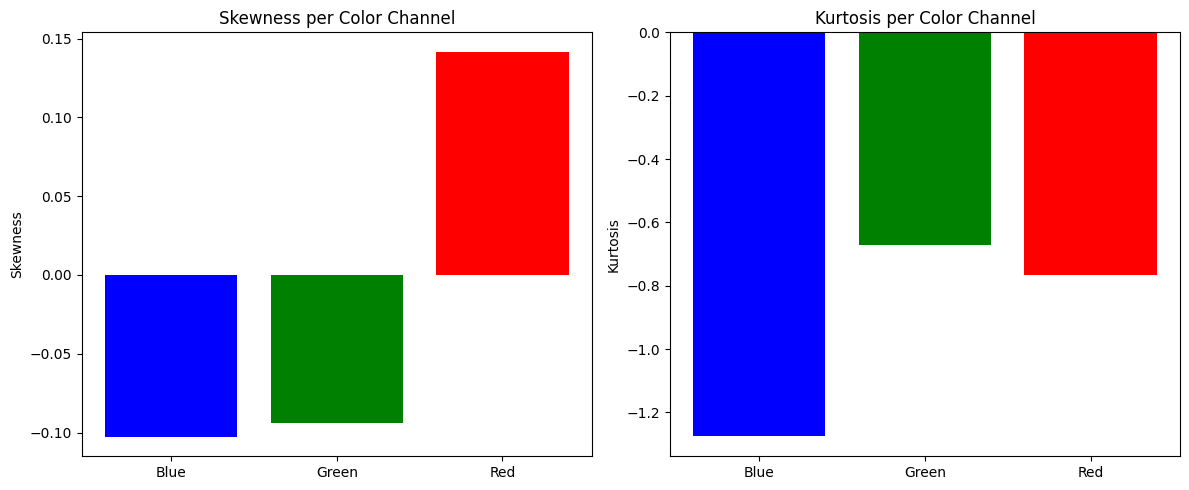

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung mean 
def calculate_mean(channel):
    total = np.sum(channel)
    num_pixels = channel.size
    mean = total / num_pixels
    return mean

# Fungsi untuk menghitung varians 
def calculate_variance(channel, mean):
    total = np.sum((channel - mean) ** 2)
    num_pixels = channel.size
    variance = total / num_pixels
    return variance

# Fungsi untuk menghitung skewness 
def calculate_skewness(channel, mean, std_deviation):
    total = np.sum(((channel - mean) / std_deviation) ** 3)
    num_pixels = channel.size
    skewness = total / num_pixels
    return skewness

# Fungsi untuk menghitung kurtosis 
def calculate_kurtosis(channel, mean, std_deviation):
    total = np.sum(((channel - mean) / std_deviation) ** 4)
    num_pixels = channel.size
    kurtosis = total / num_pixels - 3  # Excess kurtosis
    return kurtosis

# Membaca citra berwarna
image = cv2.imread('sunset.jpeg')
blue_channel, green_channel, red_channel = cv2.split(image)

# Menghitung statistik untuk setiap kanal 
def calculate_statistics_manual(channel):
    # Mean
    mean = calculate_mean(channel)
    
    # Variance
    variance = calculate_variance(channel, mean)
    
    # Standard Deviation
    std_deviation = np.sqrt(variance)
    
    # Skewness
    skewness = calculate_skewness(channel, mean, std_deviation)
    
    # Kurtosis
    kurtosis = calculate_kurtosis(channel, mean, std_deviation)
    
    return mean, variance, std_deviation, skewness, kurtosis

# Menghitung statistik untuk kanal biru
mean_blue, var_blue, std_blue, skew_blue, kurt_blue = calculate_statistics_manual(blue_channel)

# Menghitung statistik untuk kanal hijau
mean_green, var_green, std_green, skew_green, kurt_green = calculate_statistics_manual(green_channel)

# Menghitung statistik untuk kanal merah
mean_red, var_red, std_red, skew_red, kurt_red = calculate_statistics_manual(red_channel)

# Menampilkan hasil
print("Blue Channel:")
print(f"Mean Intensity: {mean_blue}")
print(f"Variance: {var_blue}")
print(f"Standard Deviation: {std_blue}")
print(f"Skewness: {skew_blue}")
print(f"Kurtosis: {kurt_blue}\n")

print("Green Channel:")
print(f"Mean Intensity: {mean_green}")
print(f"Variance: {var_green}")
print(f"Standard Deviation: {std_green}")
print(f"Skewness: {skew_green}")
print(f"Kurtosis: {kurt_green}\n")

print("Red Channel:")
print(f"Mean Intensity: {mean_red}")
print(f"Variance: {var_red}")
print(f"Standard Deviation: {std_red}")
print(f"Skewness: {skew_red}")
print(f"Kurtosis: {kurt_red}")

# Menampilkan Histogram
plt.figure(figsize=(12, 5))

# Histogram untuk Blue Channel
plt.subplot(1, 3, 1)
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.6)
plt.title("Blue Channel Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")

# Histogram untuk Green Channel
plt.subplot(1, 3, 2)
plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.6)
plt.title("Green Channel Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")

# Histogram untuk Red Channel
plt.subplot(1, 3, 3)
plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.6)
plt.title("Red Channel Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Plot Skewness dan Kurtosis
channels = ['Blue', 'Green', 'Red']
skewness_values = [skew_blue, skew_green, skew_red]
kurtosis_values = [kurt_blue, kurt_green, kurt_red]

plt.figure(figsize=(12, 5))

# Grafik Skewness
plt.subplot(1, 2, 1)
plt.bar(channels, skewness_values, color=['blue', 'green', 'red'])
plt.title("Skewness per Color Channel")
plt.ylabel("Skewness")

# Grafik Kurtosis
plt.subplot(1, 2, 2)
plt.bar(channels, kurtosis_values, color=['blue', 'green', 'red'])
plt.title("Kurtosis per Color Channel")
plt.ylabel("Kurtosis")

plt.tight_layout()
plt.show()
